<a href="https://colab.research.google.com/github/22922511/House_price_prediction/blob/main/Bengaluru%20House%20price%20MODEL%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("sklearn",sklearn.__version__)


pandas 2.2.2
numpy 2.0.2
sklearn 1.6.1


In [3]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [4]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6414,Super built-up Area,Ready To Move,Banashankari,3 BHK,Bregae,1650,3.0,2.0,101.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.0
9303,Super built-up Area,Ready To Move,Gopalkrishna Nagar,2 BHK,MJarlPe,1155,2.0,1.0,65.0
8505,Super built-up Area,18-May,Panathur,2 BHK,Saite G,1040,2.0,1.0,41.6
4335,Super built-up Area,Ready To Move,Daadys Gaarden Layout,3 BHK,InockHo,1600,3.0,3.0,72.0


In [5]:



df.shape

(13320, 9)

In [6]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [7]:
##
df=df.drop(columns=['availability','society','area_type'])

In [8]:
df.sample(5)

,location,size,total_sqft,bath,balcony,price
10650,Thanisandra,3 BHK,1732,3.0,1.0,112.0
8750,RMV Extension,2 BHK,1152,2.0,1.0,57.0
4303,Kereguddadahalli,3 BHK,1300,2.0,2.0,39.0
3296,Electronics City Phase 1,3 BHK,1555,2.0,1.0,82.0
1621,Shampura,2 BHK,1200,2.0,3.0,53.0


In [9]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

##Extracted BHK value from size

In [12]:
df['BHK']=df['size'].apply(lambda bhk : int(bhk.split()[0]))

In [13]:
##
df=df.drop(columns=['size'])

In [14]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
1575,Kogilu,925,7.0,3.0,88.00,7
11198,Battarahalli,2500,3.0,1.0,65.00,4
4829,Channasandra,1200,3.0,1.0,67.77,3
5839,Sarjapur Road,1040,2.0,1.0,37.00,2
5475,Kanakpura Road,900,2.0,1.0,41.00,2


In [15]:
df.isnull().sum()

,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


## finding the average of total_sqft value of range given

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
## check to float
def check_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [18]:
df[~df['total_sqft'].apply(check_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [19]:
## taking avearge of range
def to_float(x):
  tokn=x.split('-')
  if len(tokn)==2 :
    return (float(tokn[0])+(float(tokn[1])))/2
  try :
    return float(x)
  except:
    return None

In [20]:
df['total_sqft']=df['total_sqft'].apply(to_float)

In [21]:
df.iloc[30]

,33
location,Raja Rajeshwari Nagar
total_sqft,1693.0
bath,3.0
balcony,3.0
price,57.39
BHK,3


In [22]:
df.isnull().sum()

,0
location,0
total_sqft,42
bath,0
balcony,0
price,0
BHK,0


In [23]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
10096,Ramesh Nagar,1400.0,2.0,2.0,160.0,2
2900,Nagarbhavi,600.0,3.0,1.0,83.0,3
11661,Chandapura,1200.0,2.0,1.0,52.0,3
497,Kereguddadahalli,950.0,2.0,1.0,32.0,2
9408,Sarjapur Road,984.0,2.0,1.0,59.0,2


In [24]:
df.shape

(12710, 6)

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(12668, 6)

<Axes: >

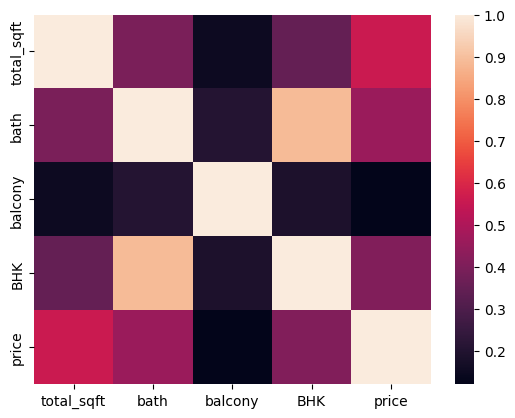

In [27]:
##
sns.heatmap(df[['total_sqft','bath','balcony','BHK','price']].corr())

In [28]:
##
df['BHK'].corr(df['bath'])

np.float64(0.8873814372102272)

## corelation between price and balcony is very low that support  to drop

In [29]:
##
print('correlation between balcony and price ' ,df['balcony'].corr(df['price']))
print('correlation between total_sqft and price ' ,df['total_sqft'].corr(df['price']))
print('correlation between BHK and price ' ,df['BHK'].corr(df['price']))
print('correlation between bath and price ' ,df['bath'].corr(df['price']))



correlation between balcony and price  0.12040737989186838
correlation between total_sqft and price  0.5585554366599386
correlation between BHK and price  0.40664509442161734
correlation between bath and price  0.4593201142416952


In [30]:
df1=df.drop(columns=['balcony'])

In [31]:
df.isnull().sum()

,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


In [32]:
df1.sample(5)

,location,total_sqft,bath,price,BHK
12473,Motappa Layout,1113.0,2.0,52.00,2
1543,Vijayanagar,1490.0,3.0,100.00,3
5374,Varthur Road,805.5,2.0,19.33,2
10576,Electronic City,550.0,1.0,27.00,1
4567,Seegehalli,4000.0,3.0,235.00,3


In [33]:
df1=df1.dropna()

In [34]:
df1.isnull().sum()

,0
location,0
total_sqft,0
bath,0
price,0
BHK,0


##Feature Engineering

## Creating a new featue price per square feet area

In [113]:
df1['price_per_sqft']=df1['price']*100000/df['total_sqft']

In [114]:
df1.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
11278,Marathahalli,1108.0,2.0,60.0,3,5415.162455,369.333333
5925,others,2663.0,4.0,338.0,3,12692.452122,887.666667
2068,Brookefield,1476.0,3.0,105.0,3,7113.821138,492.000000
9641,others,2400.0,3.0,408.0,3,17000.000000,800.000000
4758,Sarjapur Road,715.0,1.0,29.0,1,4055.944056,715.000000


## we have around 1300 different value in location so to replacing it with other if count of any location less then 15

In [115]:
location_count=df1['location'].value_counts().reset_index()
location_count.columns = ['location', 'count']

In [116]:
location_less_then_15=location_count[location_count['count']< 15].location.tolist()

In [117]:
df1.location=df1['location'].apply(lambda x : 'others' if x in location_less_then_15 else x )

In [118]:
df1['location'].value_counts()

,count
location,
others,3459
Whitefield,513
Sarjapur Road,372
Electronic City,300
Kanakpura Road,259
...,...
Arekere,15
Varthur Road,15
Kasturi Nagar,15


In [119]:
df1['location'].value_counts()

,count
location,
others,3459
Whitefield,513
Sarjapur Road,372
Electronic City,300
Kanakpura Road,259
...,...
Arekere,15
Varthur Road,15
Kasturi Nagar,15


In [120]:
print(df1.shape)
df1.sample(2)

(12668, 7)


,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
8844,others,1350.0,2.0,47.25,3,3500.0,450.000000
1095,Uttarahalli,1390.0,2.0,62.55,3,4500.0,463.333333


## for typically one bedroom sqft range from 300 to 400 in bengaluru from source nobrocker
https://www.nobroker.in/1bhk-flats-for-rent-in-bangalore_bangalore#signup-login

In [121]:
#df2=df1[(df1['total_sqft']/df1['BHK'])>=200]

df1['1BHK_size']=(df1['total_sqft']/df1['BHK'])
df2=df1

In [122]:
df2['1BHK_size'].describe()

,1BHK_size
count,12668.000000
mean,570.060291
std,380.298999
min,0.714286
25%,473.333333
50%,550.000000
75%,622.500000
max,26136.000000


In [123]:
         q1=df2['1BHK_size'].quantile(.25)
         q3=df2['1BHK_size'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.2 * IQR
         upper_bound = q3 + 2.2* IQR
         print(f'lower_limit {lower_bound} and upper_limit {upper_bound}')
         df2=df2[(df2['1BHK_size'] >=lower_bound) & (df2['1BHK_size']<=upper_bound)]



lower_limit 294.33333333333326 and upper_limit 950.6666666666667


<Axes: xlabel='1BHK_size', ylabel='Count'>

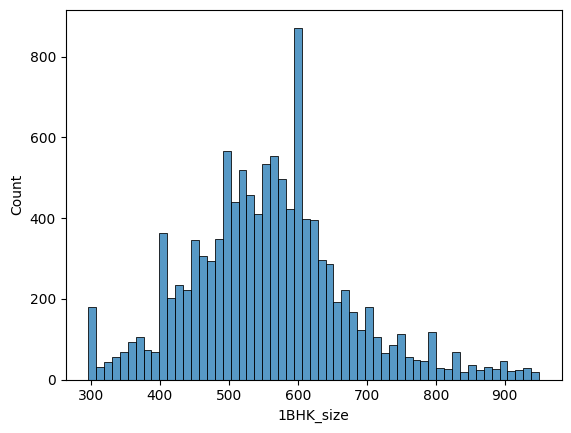

In [124]:
sns.histplot(df2['1BHK_size'])

In [125]:
df2.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
11380,others,2000.0,4.0,65.00,5,3250.000000,400.000000
715,others,1570.0,3.0,62.00,3,3949.044586,523.333333
9114,Kudlu,1293.0,2.0,80.00,3,6187.161640,431.000000
9092,others,1067.0,2.0,33.99,2,3185.567010,533.500000
3212,Yelahanka,1026.0,2.0,41.00,2,3996.101365,513.000000


In [126]:
df2.shape

(11603, 7)

In [127]:
df2['price_per_sqft'].describe()

,price_per_sqft
count,11603.000000
mean,6086.242448
std,3846.903987
min,500.000000
25%,4185.721589
50%,5208.333333
75%,6705.710856
max,176470.588235


## outlier removing

In [128]:
def removes_outliers_location(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('location'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [129]:
def removes_outliers_bhk(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('BHK'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [130]:
df3=removes_outliers_location(df2)
df3=removes_outliers_bhk(df3)


1st Phase JP Nagar: 3 rows removed
2nd Stage Nagarbhavi: 2 rows removed
5th Phase JP Nagar: 2 rows removed
6th Phase JP Nagar: 0 rows removed
7th Phase JP Nagar: 4 rows removed
8th Phase JP Nagar: 7 rows removed
9th Phase JP Nagar: 2 rows removed
Abbigere: 5 rows removed
Akshaya Nagar: 8 rows removed
Ambalipura: 3 rows removed
Ambedkar Nagar: 4 rows removed
Amruthahalli: 2 rows removed
Anandapura: 0 rows removed
Ananth Nagar: 3 rows removed
Anekal: 3 rows removed
Anjanapura: 3 rows removed
Ardendale: 2 rows removed
Arekere: 0 rows removed
Attibele: 5 rows removed
BTM 2nd Stage: 1 rows removed
BTM Layout: 1 rows removed
Babusapalaya: 1 rows removed
Balagere: 1 rows removed
Banashankari: 7 rows removed
Banashankari Stage II: 1 rows removed
Banashankari Stage III: 3 rows removed
Banashankari Stage VI: 3 rows removed
Banaswadi: 3 rows removed
Bannerghatta: 0 rows removed
Bannerghatta Road: 7 rows removed
Basavangudi: 1 rows removed
Basaveshwara Nagar: 0 rows removed
Battarahalli: 1 rows re

In [131]:
df3['BHK'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 27])

In [132]:
df3.shape

(10402, 7)

In [133]:
df3.groupby('BHK').count()

,location,total_sqft,bath,price,price_per_sqft,1BHK_size
BHK,,,,,,
1,521,521,521,521,521,521
2,5072,5072,5072,5072,5072,5072
3,4000,4000,4000,4000,4000,4000
4,621,621,621,621,621,621
5,90,90,90,90,90,90
6,52,52,52,52,52,52
7,21,21,21,21,21,21
8,16,16,16,16,16,16
9,6,6,6,6,6,6


In [134]:
df3=df3[df3['BHK']<=6]

In [135]:
df3.shape

(10356, 7)

In [136]:
df3.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
9433,others,1936.0,3.0,139.00,3,7179.752066,645.333333
7936,Sarjapur Road,1489.0,3.0,88.00,3,5910.006716,496.333333
9934,Thigalarapalya,3362.0,5.0,249.00,4,7406.305770,840.500000
3389,Raja Rajeshwari Nagar,1140.0,2.0,38.65,2,3390.350877,570.000000
4732,others,920.0,2.0,37.00,2,4021.739130,460.000000


## removing outlier form bathroom
##what if bathroom =16

In [137]:
df3[df3['bath']>8]

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size


In [138]:
df4=df3[df3['bath']<=df3['BHK']+1]
print(f'{len(df3)-len(df4)} removed')

60 removed


In [139]:
df4.shape

(10296, 7)

(array([6.180e+02, 6.344e+03, 0.000e+00, 2.583e+03, 0.000e+00, 5.390e+02,
        1.700e+02, 0.000e+00, 3.700e+01, 5.000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

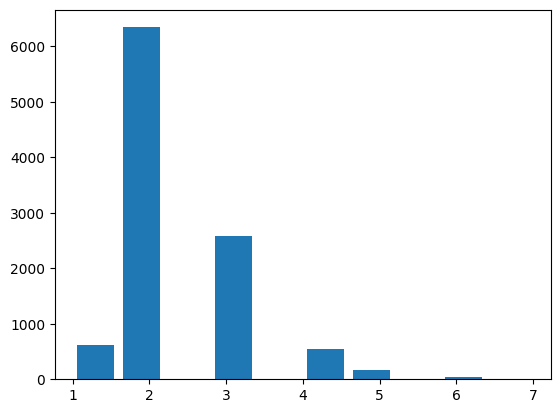

In [140]:
plt.hist(df4['bath'],rwidth=.8)

In [146]:
dftem=df4
dftem.sample(2)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
5657,7th Phase JP Nagar,1680.0,3.0,125.0,3,7440.476190,560.0
4043,Vidyaranyapura,1175.0,2.0,35.0,2,2978.723404,587.5


In [147]:
dftem['price_per_sqft'].corr(dftem['price'])

np.float64(0.7727274339326006)

In [148]:
dftem['1BHK_size'].corr(dftem['price'])

np.float64(0.43180371730540495)

## droped  the some fearure including size

In [149]:

df5=df4.drop(columns=['1BHK_size'])

# df5=df4

In [ ]:
df5[]

In [150]:
df5.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
6393,Electronics City Phase 1,1291.0,2.0,32.00,3,2478.698683
8034,Subramanyapura,1400.0,2.0,55.00,3,3928.571429
2692,Kannamangala,1262.0,2.0,55.00,2,4358.161648
4468,others,1060.0,2.0,55.00,2,5188.679245
6615,Hebbal,1255.0,3.0,77.68,3,6189.641434


In [151]:
df5['location']=df5['location'].apply(lambda x : x.lower())

 ##One hot encoding on location

In [152]:
coded_df=pd.get_dummies(df5.location)
coded_df.sample(2)

,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,akshaya nagar,ambalipura,ambedkar nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4423,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [153]:
df6=pd.concat([df5,coded_df.drop(columns='others')],axis='columns')

In [154]:
df6.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
4010,varthur,1180.0,2.0,55.00,2,4661.016949,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4803,others,1355.0,2.0,75.00,2,5535.055351,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6925,jp nagar,1500.0,2.0,108.00,3,7200.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3833,thanisandra,933.0,2.0,55.00,2,5894.962487,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4553,others,1395.0,2.0,63.59,2,4558.422939,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
df6.drop(columns=['location'],inplace=True)

In [156]:
df6.sample(5)

,total_sqft,bath,price,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
10253,2400.0,6.0,125.00,5,5208.333333,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9544,1650.0,3.0,140.00,3,8484.848485,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259,690.0,1.0,39.80,1,5768.115942,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3968,1000.0,2.0,52.00,2,5200.000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4147,1216.0,2.0,66.48,2,5467.105263,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [157]:
df6.shape

(10296, 182)

In [158]:
X=df6.drop(columns=['price'])
Y=df6['price']

In [159]:
Y.sample(1)


,price
1584,48.0


In [160]:
X.sample(1)

,total_sqft,bath,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
5275,1225.0,2.0,2,3918.367347,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
print(X.shape,Y.shape)

(10296, 181) (10296,)


In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=.2,random_state=20)

In [163]:
print(f'train size {X_train.shape}: test size {X_test.shape}')

train size (8236, 181): test size (2060, 181)


In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


model=LinearRegression()
model.fit(X_train,y_train)
print(f'r2 score on test {model.score(X_test,y_test)} and on train {model.score(X_train,y_train)}')
scores = cross_val_score(model, X_test, y_test, cv=5)
print(f"Cross-validation accuracy: {scores.mean():.2f}")

r2 score on test 0.9581930019568463 and on train 0.9545856344163732
Cross-validation accuracy: 0.95


In [166]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print(f'r2 score on test {tree.score(X_test,y_test)} and on train {tree.score(X_train,y_train)}')

r2 score on test 0.9966208284459069 and on train 1.0


In [167]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=.75)
ridge.fit(X_train, y_train)
print(f'r2 score on test {ridge.score(X_test,y_test)} and on train {ridge.score(X_train,y_train)}')

r2 score on test 0.9583384763622381 and on train 0.9545777060130491


In [168]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print(f'r2 score on test {lasso.score(X_test,y_test)} and on train {lasso.score(X_train,y_train)}')

r2 score on test 0.9544950478658671 and on train 0.9476545465731289


In [169]:
X_test.sample()

,total_sqft,bath,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
9509,1681.0,3.0,3,4104.699584,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
length_ip=len(X_test.columns)
data_columns=X_test.columns

In [234]:
def predict(total_sqft,bath,bhk,location):
 x=np.zeros(length_ip)
 location=location.lower()
 index_of_location=np.where(data_columns==location)[0][0]
 x[0]=total_sqft
 x[1]=bath
 x[2]=bhk
 x[index_of_location]=1
 x_df = pd.DataFrame([x], columns=data_columns)
 return model.predict(x_df)[0]

In [235]:
predict(6000,2,4,'CV Raman Nagar')

np.float64(287.00445075832613)

##Importing model

In [242]:
import pickle
with open('House_price_prediction_model_version3.pkl','wb') as f:
   pickle.dump(model,f)


In [237]:
import json
columns_name ={
    'columns':[x for x in data_columns]
}

with open('columns_name.json','w') as f:
  json.dump(columns_name,f)


In [238]:
columns_name['columns'].index('panathur')

143

In [246]:
import pickle
with open("/content/House_price_prediction_model_version2.pkl","rb") as f:
  model=pickle.load(f);

In [247]:
model.score(X_train,y_train)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price_per_sqft
Feature names seen at fit time, yet now missing:
- benson town
- chikka tirupathi
- cooke town
- judicial layout
- kodihalli
- ...


In [ ]:
predict(1400,2,2,"varthur")

IMPORTING REQUIREMENT FILE

In [ ]:
with open("requirements.txt",'w') as f:
  f.write("")
pip freeze > requirements.txt